## Ejercicio 3. 

Nos piden aplicar las funciones para:

***[1]***: Calcular el autovector asociado al autovalor más chico de la matríz L.

***[2]***: Calcular el autovector asociado al autovalor más grande de R.

Además, interpretar los valores que nos dan en términos del grafo.

También nos piden calcular los vectores ***s*** asociados a estos autovectores y comparar con la particion esperada con el grafo de ejemplo.


In [ ]:
import numpy as np
from linalg import *


In [4]:
# Grafo de ejemplo
A_sample = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 1, 1, 0]
])

# Función para obtener el vector s
comunidades = lambda autovector: [1 if x > 0 else -1 for x in autovector] 

***[1]*** Calculamos el autovector asociado al segundo autovalor más chico de L ($\lambda>0$)

Este $\lambda_{min}$ esta asociado a un autovector $v_{min} \in \Re^{N}$ que se interpreta como.
$$\begin{cases}
    sign(v_i) = 1 & \text{ si museo}_i \in \text{comunidadA} \\
    sign(v_i) = -1 & \text{ si museo}_i \in \text{comunidadB} \\
\end{cases}$$ 

***N***: cantidad de musos

<center> <img src='img/comunidades_L.png' width=500, height=300> </center>

In [9]:
L_sample = calcula_L(A_sample)
segundo_autovalor_minimo_L, segundo_autovector_minimo_L = metpotI2(L_sample, mu=1e-5)

print("Segundo autovalor mínimo de L:", segundo_autovalor_minimo_L)
print("Comunidades (s): ", comunidades(segundo_autovector_minimo_L))

Segundo autovalor mínimo de L: 9.99999999991994e-06
Comunidades (s):  [-1, -1, -1, -1, 1, 1, 1, 1]


***[2]***: Calcular el autovector asociado al autovalor más grande de R.

Este $\lambda_{max}$ esta asociado a un autovector $v_ \in \Re^{N}$ que se interpreta como.
$$\begin{cases}
    sign(v_i) = 1 & \text{ si museo}_i \in \text{comunidadA} \\
    sign(v_i) = -1 & \text{ si museo}_i \in \text{comunidadB} \\
\end{cases}$$ 

<center> <img src='img/comunidades_R.png' width=500, height=300> </center>

In [10]:
R_sample = calcula_R(A_sample)
autovalor_maximo_R, autovector_maximo_R = metpot(R_sample)

print("Autovalor máximo para R:", autovalor_maximo_R)
print("Comunidades (s): ", comunidades(autovector_maximo_R))

Autovalor máximo para R: -2.4446460281609754
Comunidades (s):  [1, 1, 1, 1, 1, 1, 1, 1]


## Ejercicio 4.

In [11]:
import geopandas as gpd 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import networkx as nx
from template_funciones import * 

In [12]:
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()
M = [3, 5, 10, 50]

def construir_grafo(A):
    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    return G, G_layout

In [13]:
#siendo m la cantidad de conexiones 
A1 = construye_adyacencia(D,3)
A2 = construye_adyacencia(D,5)
A3 = construye_adyacencia(D,10)
A4 = construye_adyacencia(D,50)


#calculo de las particiones optimas 
#(laplaciano):
s_l1 = laplaciano_iterativo(A1, 2) ## 2^k niveles 
s_l2 = laplaciano_iterativo(A2, 2)
s_l3 = laplaciano_iterativo(A3, 2)
s_l4 = laplaciano_iterativo(A4, 2)

#(modularidad):
mod1 = modularidad_iterativo(A1)
mod2 = modularidad_iterativo(A2)
mod3 = modularidad_iterativo(A3)
mod4 = modularidad_iterativo(A4)

print("vectores óptimos para criterio del corte mínimo \n") 

#considerando un k=2 para el nivel 
print(f"Corte minimo con 3 conexiones = {s_l1}")
print(f"Corte minimo con 5 conexiones = {s_l2}")
print(f"Corte minimo con 10 conexiones = {s_l3}")
print(f"Corte minimo con 50 conexiones = {s_l4}")

print("-------------------------------------------------------")
print("Vectores óptimos para el criterio de modularidad\n")
print(f"Modularidad con 3 conexiones = {mod1}")
print(f"Modularidad con 5 conexiones = {mod2}")
print(f"Modularidad con 10 conexiones = {mod3}")
print(f"Modularidad con 50 conexiones = {mod4}")



vectores óptimos para criterio del corte mínimo 

Corte minimo con 3 conexiones = [[np.int64(1), np.int64(8), np.int64(19), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(49), np.int64(50), np.int64(52), np.int64(53), np.int64(55), np.int64(57), np.int64(77), np.int64(79), np.int64(80), np.int64(82), np.int64(84), np.int64(85), np.int64(113)], [np.int64(3), np.int64(4), np.int64(6), np.int64(11), np.int64(17), np.int64(22), np.int64(24), np.int64(25), np.int64(34), np.int64(39), np.int64(42), np.int64(65), np.int64(86), np.int64(87), np.int64(88), np.int64(89), np.int64(126), np.int64(130), np.int64(131)], [np.int64(0), np.int64(2), np.int64(5), np.int64(9), np.int64(10), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(18), np.int64(21), np.int64(23), np.int64(32), np.int64(35), np.int64(38), np.int64(40), np.int64(43), np.int64(47), np.int64(48), np.int64(56), np.int64(59), np.int64(61), np.int64(63), np.int64(66), np.int6

In [15]:
def graficar_particion(A, comunidades, titulo, ax, colores):

    # Graficamos los barrios
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=ax)

    # Construimos el grafo
    G, G_layout = construir_grafo(A)

    # Generamos colores para las particiones
    colores = plt.cm.Set1(np.linspace(0, 1, len(comunidades)))

    # Crear diccionario de colores para cada nodo
    node_colors = {}
    for i, particion in enumerate(comunidades):
        for nodo in particion:
            node_colors[nodo] = colores[i]

    # Crear lista de colores en el orden de los nodos del grafo
    node_color_list = [node_colors.get(nodo, 'lightgray') for nodo in G.nodes()]

    # Dibujar el grafo con colores por partición
    nx.draw_networkx_nodes(G, G_layout, 
                            node_color=node_color_list, 
                            node_size=300, 
                            alpha=0.8, 
                            ax=ax)

    # nx.draw_networkx_labels(G, G_layout, 
    #                         font_size=8, 
    #                         font_color='white', 
    #                         font_weight='bold', 
    #                         ax=ax)

    # Agregar leyenda
    legend_elements = [Line2D([0], [0], marker='o', color='w', 
                                markerfacecolor=colores[i], markersize=10, 
                                label=f'Partición {i+1}')
                        for i in range(len(comunidades))]

    # ax.legend(handles=legend_elements, loc='upper right')

    # ax.title('Red con particiones coloreadas')


#### Particiones óptimas calculadas con el método de modularidad:

TypeError: graficar_particion() missing 1 required positional argument: 'colores'

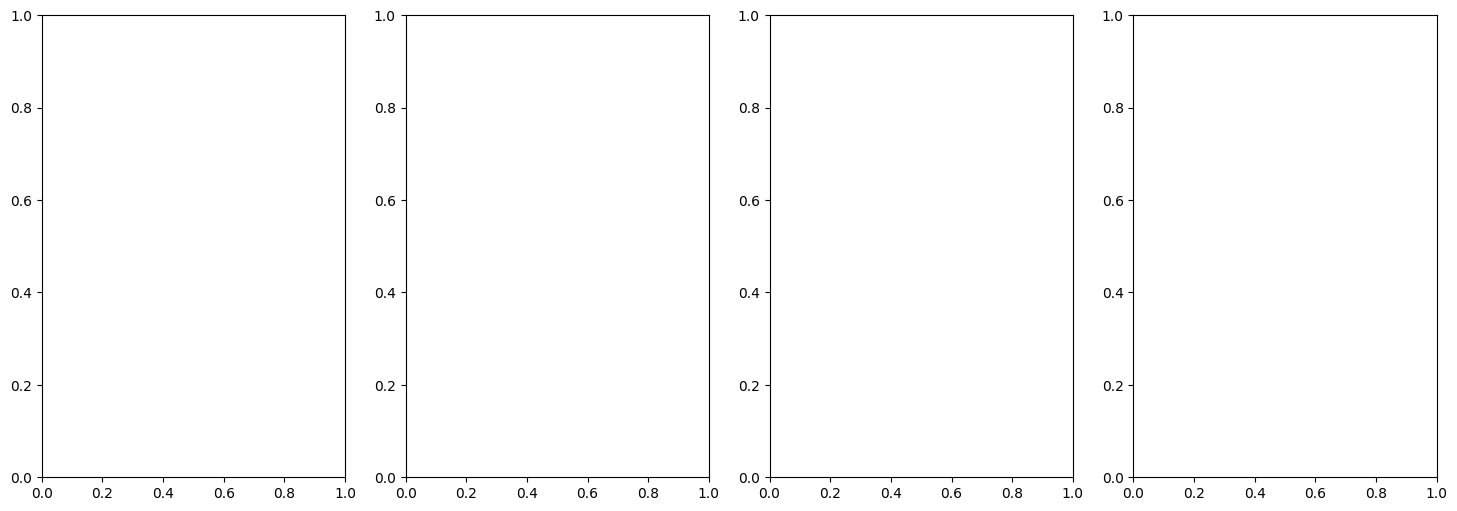

In [ ]:
fig, axes = plt.subplots(1, len(M), figsize=(18, 6))

for i, m in enumerate(M):
    A = simetrizar_A(construye_adyacencia(D, m))
    comunidades = modularidad_iterativo(A)
    graficar_particion(A, comunidades[i], titulo=f"Partición óptima con modularidad {m}", ax=axes[i])

plt.tight_layout()
plt.show()

#### Particiones óptimas calculadas con el método de Laplaciano:

In [ ]:
for A in matrices_A:
    particiones = laplaciano_iterativo(A, niveles=1)
    